**Crude oil price prediction**

**What is Crude Oil?**


Crude oil is a naturally occurring, unrefined petroleum product composed of hydrocarbon deposits and other organic materials. A type of fossil fuel, crude oil can be refined to produce usable products such as gasoline, diesel and various forms of petrochemicals. It is a nonrenewable resource, which means that it can't be replaced naturally at the rate we consume it and is therefore a limited resource.

Crude oil is typically obtained through drilling, where it is usually found alongside other resources, such as natural gas (which is lighter, and therefore sits above the crude oil) and saline water (which is denser, and sinks below). It is then refined and processed into a variety of forms, such as gasoline, kerosene and asphalt, and sold to consumers. Although it is often called "black gold," crude oil has ranging viscosity and can vary in color from black and yellow depending on its hydrocarbon composition. Distillation, the process by which oil is heated and separated in different components, is the the first stage in refining.

**History of Crude Oil Usage**


Although fossil fuels like coal have been harvested in one way or another for centuries, crude oil was first discovered and developed during the Industrial Revolution, and its industrial uses were first developed in the 19th century. Newly invented machines revolutionized the way we do work, and they depended on these resources to run. Today, the world's economy is largely dependent on fossil fuels such as crude oil, and the demand for these resources often spark political unrest, since a small number of countries control the largest reservoirs. Like any industry, supply and demand heavily affects the prices and profitability of crude oil. The United States, Saudi Arabia, and Russia are the leading producers of oil in the world.

In the late 19th and early 20th centuries, however, the United States was one of the world's leading oil producers, and U.S. companies developed the technology to make oil into useful products like gasoline. During the middle and last decades of the 20th century, however, U.S. oil production fell dramatically, and the U.S. became an energy importer. Its major supplier was the Organization of Petroleum Exporting Countries (OPEC), founded in 1960, which consists of the world's largest (by volume) holders of crude oil and natural gas, reserves. As such, the OPEC nations had a lot of economic leverage in determining supply, and therefore the price, of oil in the late 1900s.

In the early 21st century, the development of new technology, particularly hydro-fracturing, has created a second U.S. energy boom, largely decreasing the importance and influence of OPEC.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import math
from sklearn.preprocessing import MinMaxScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing necessary Libraries

import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Plotting library

from fbprophet import Prophet # Time series prediction library
from fbprophet.diagnostics import cross_validation # For cross validation
from fbprophet.diagnostics import performance_metrics # Metrics
from fbprophet.plot import plot_cross_validation_metric # metric plot

%matplotlib inline

In [ ]:
# Reading the data
df = pd.read_csv('/content/crude-oil-price.csv',parse_dates = ['date'])

In [ ]:
# First five rows data
df.head()

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62


In [ ]:
# last five rows data
df.tail()

,date,price,percentChange,change
464,2021-11-01,65.85,-19.479090,-15.93
465,2021-12-01,74.88,13.712984,9.03
466,2022-01-03,86.49,15.504808,11.61
467,2022-02-01,95.72,10.671754,9.23
468,2022-03-01,109.33,14.218554,13.61


In [ ]:

df.shape

(469, 4)

In [ ]:
# Data types
df.dtypes

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
dtype: object

In [ ]:
# Basic data stats
df.describe()

,price,percentChange,change
count,469.000000,468.000000,468.000000
mean,44.071641,0.838667,0.171068
std,28.376748,10.685748,4.954575
min,10.420000,-54.244861,-32.830000
25%,20.270000,-5.040127,-1.632500
50%,30.830000,0.956201,0.280000
75%,63.580000,6.511568,2.317500
max,140.000000,88.375796,16.650000


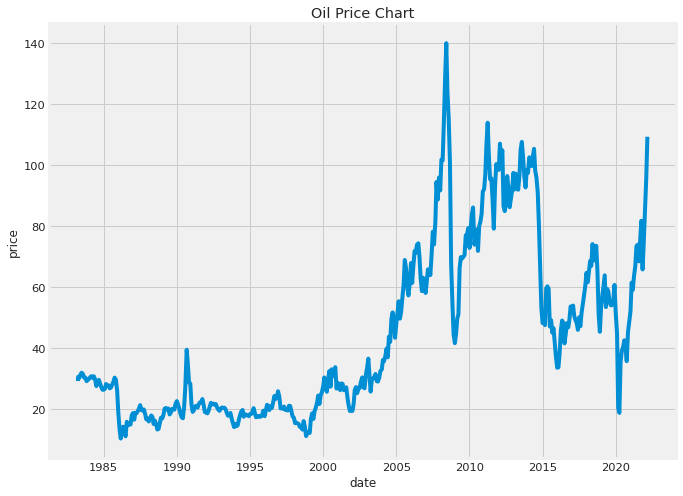

In [ ]:
# Time vs Price line plot
plt.figure(figsize = (10,8))
sns.lineplot(data=df, x = 'date', y = 'price')
plt.title('Oil Price Chart')
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

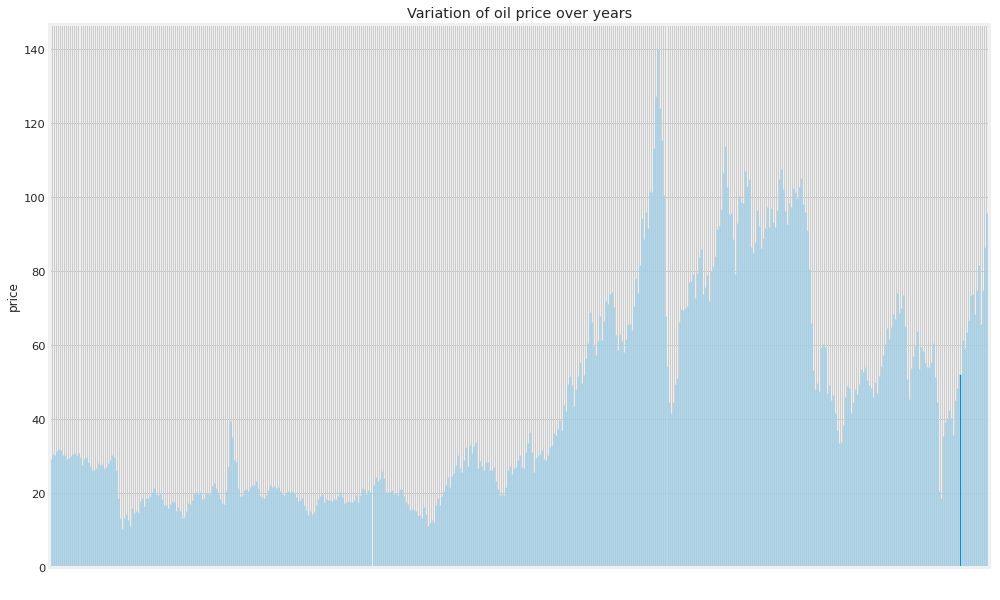

In [ ]:
plt.figure(figsize=(15,10))
df['price'].plot(kind='bar')
plt.title('Variation of oil price over years')
plt.ylabel('price')
plt.xticks(color = 'w',rotation=90)

In [ ]:
df['year']=df['date'].dt.year

In [ ]:
df.head()

,date,price,percentChange,change,year
0,1983-03-30,29.27,NaN,NaN,1983
1,1983-04-04,30.63,4.646396,1.36,1983
2,1983-05-02,30.25,-1.240614,-0.38,1983
3,1983-06-01,31.38,3.735537,1.13,1983
4,1983-07-01,32.00,1.975781,0.62,1983


Text(0, 0.5, 'Price in $')

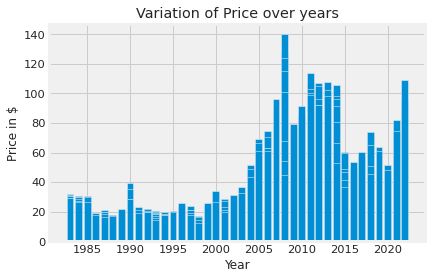

In [ ]:
x=df['year']
y=df['price']
plt.bar(x,y)
plt.title('Variation of Price over years')
plt.xlabel('Year')
plt.ylabel('Price in $')

In [ ]:
df.tail()

,date,price,percentChange,change,year
464,2021-11-01,65.85,-19.479090,-15.93,2021
465,2021-12-01,74.88,13.712984,9.03,2021
466,2022-01-03,86.49,15.504808,11.61,2022
467,2022-02-01,95.72,10.671754,9.23,2022
468,2022-03-01,109.33,14.218554,13.61,2022


In [ ]:
df['year'].isnull().sum()

0

So no need for preprocessing in year fiel

In [ ]:
df['price'].isnull().sum()

0

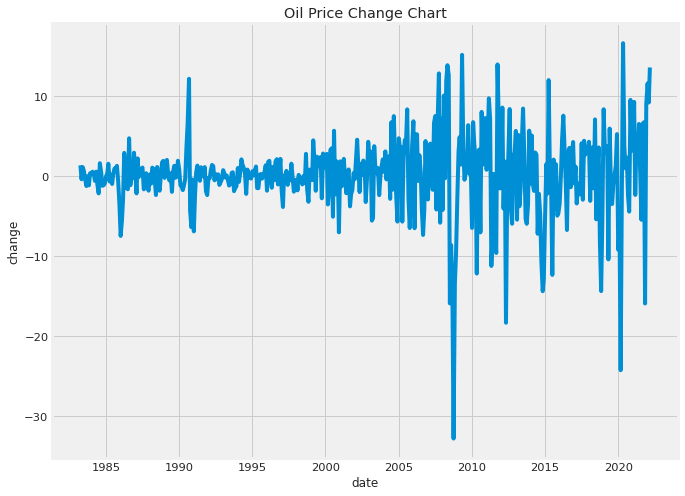

In [ ]:
# Time vs Price line plot
plt.figure(figsize = (10,8))
sns.lineplot(data=df, x = 'date', y = 'change')
plt.title('Oil Price Change Chart')
plt.show()

In [ ]:
# Renaming the columns for model prediction with prophet
df = df.rename(columns = {'date':'ds', 'price':'y'})
df.head()

,ds,y,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62


In [ ]:
#Time series model
model = Prophet()
model.fit(co_data[['ds','y']])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Future dataframe with 24 months
future = model.make_future_dataframe(periods=24,freq = 'M')

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
481,2023-03-31,47.692659,30.809106,63.895151
482,2023-04-30,46.001364,28.371924,61.836576
483,2023-05-31,41.849633,26.784984,58.792106
484,2023-06-30,49.305675,30.683663,66.700505
485,2023-07-31,54.328529,37.678400,71.967289
486,2023-08-31,41.363823,25.161910,59.020272
487,2023-09-30,47.937989,31.657446,65.935061
488,2023-10-31,55.504404,38.763732,73.301743
489,2023-11-30,36.044612,18.470143,52.793686
490,2023-12-31,36.594214,19.540393,53.369738


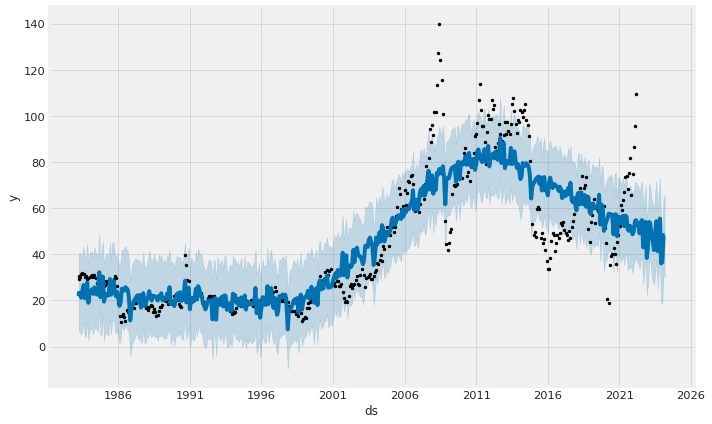

In [ ]:
# Forecast plot
fig1 = model.plot(forecast)

In [ ]:
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y')

In [ ]:
#Sort dataset by column Date
df = df.sort_values('date')
df = df.groupby('date')['price'].sum().reset_index()
df.set_index('date', inplace=True)
df=df.loc[datetime.date(year=2000,month=1,day=1):]


In [ ]:
#Read dataframe info
def DfInfo(df_initial):
    # gives some infos on columns types and numer of null values
    tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: 'column type'})
    tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'}))
    tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] * 100).T.
                               rename(index={0: 'null values (%)'}))
    return tab_info

DatetimeIndex(['2000-01-04', '2000-02-01', '2000-03-01', '2000-04-03',
               '2000-05-01', '2000-06-01', '2000-07-05', '2000-08-01',
               '2000-09-01', '2000-10-02',
               ...
               '2021-06-01', '2021-07-01', '2021-08-02', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-03',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', length=267, freq=None)

In [ ]:
DfInfo(df)

,price
column type,float64
null values (nb),0
null values (%),0.0


In [ ]:
df.index

DatetimeIndex(['2000-01-04', '2000-02-01', '2000-03-01', '2000-04-03',
               '2000-05-01', '2000-06-01', '2000-07-05', '2000-08-01',
               '2000-09-01', '2000-10-02',
               ...
               '2021-06-01', '2021-07-01', '2021-08-02', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-03',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', length=267, freq=None)

In [ ]:
y = df['price'].resample('MS').mean()

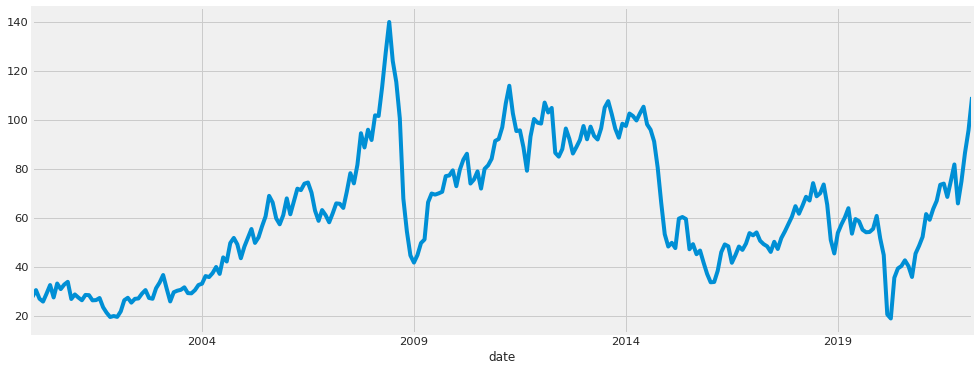

In [ ]:
y.plot(figsize=(15, 6))
plt.show()


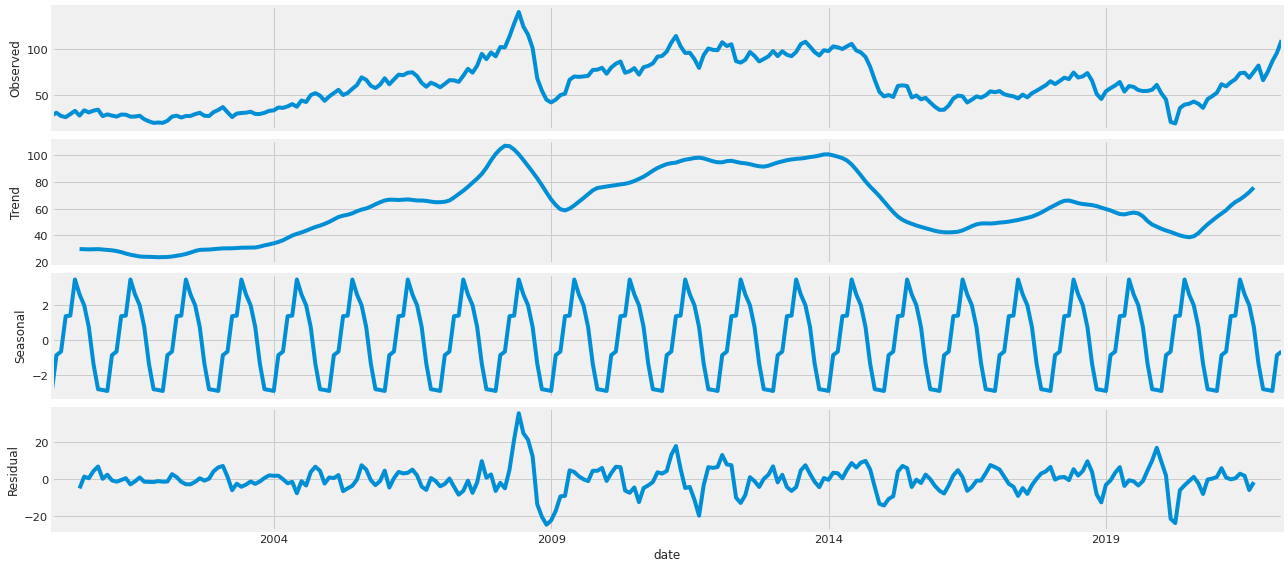

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Preparing the dataset

price = df[['price']]

# Splitting for training and testing:


sequence_length = 22 # 8 => (1234567 -> 8)
test_percentail = 0.05 # 5% de test

df = price.to_numpy()

In [ ]:
#Normalizer:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(df)
norm = scaler.transform(df)
#print(norm)
# reconstruct = scaler.inverse_transform(norm)
# print(reconstruct)

In [ ]:
data = []
for i in range(len(norm) - sequence_length):
  data.append(norm[i:i+sequence_length])

data = np.array(data);
test_set_size = int(np.round(test_percentail*data.shape[0]));
train_set_size = data.shape[0] - (test_set_size);
#print(f'test size: {test_set_size}, train size: {train_set_size}')
#>> test size: 427, train size: 8122

i_train = data[:train_set_size,:-1,:]

o_train = data[:train_set_size,-1,:]

i_test = data[train_set_size:,:-1]

o_test = data[train_set_size:,-1,:]


In [ ]:
# Model building
# Models Parameters
import torch
import torch.nn as nn
import time

i_train_tensor = torch.from_numpy(i_train).type(torch.Tensor)
i_test_tensor = torch.from_numpy(i_test).type(torch.Tensor)
o_train_tensor = torch.from_numpy(o_train).type(torch.Tensor)
o_test_tensor = torch.from_numpy(o_test).type(torch.Tensor)

input_dim = 1   # Lista de {sequence_length-1}
hidden_dim = 22 # Memoria interna das RNN/RNR
num_layers = 2  #
output_dim = 1  # 1 Lista de 1 elemento
num_epochs = 100

learn_rate = 0.01

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
# LSTM:

class LSTM(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
    super(LSTM, self).__init__()
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
    out = self.fc(out[:, -1, :])
    return out

model_LSTM = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
#criterion = torch.nn.MSELoss(reduction='sum')
#criterion = torch.nn.L1Loss()
optimiser = torch.optim.Adam(model_LSTM.parameters(), lr=learn_rate)
#optimiser = torch.optim.Adagrad(model_LSTM.parameters(), lr=learn_rate)
#optimiser = torch.optim.AdamW(model_LSTM.parameters(), lr=learn_rate)

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
  o_train_pred = model_LSTM(i_train_tensor)
  loss = criterion(o_train_pred, o_train_tensor)
  #print("Epoch ", t+1, "Loss: ", loss.item())
  hist[t] = loss.item()
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

training_time = time.time()-start_time
print(f'Training time: {training_time}')


Training time: 3.2562689781188965


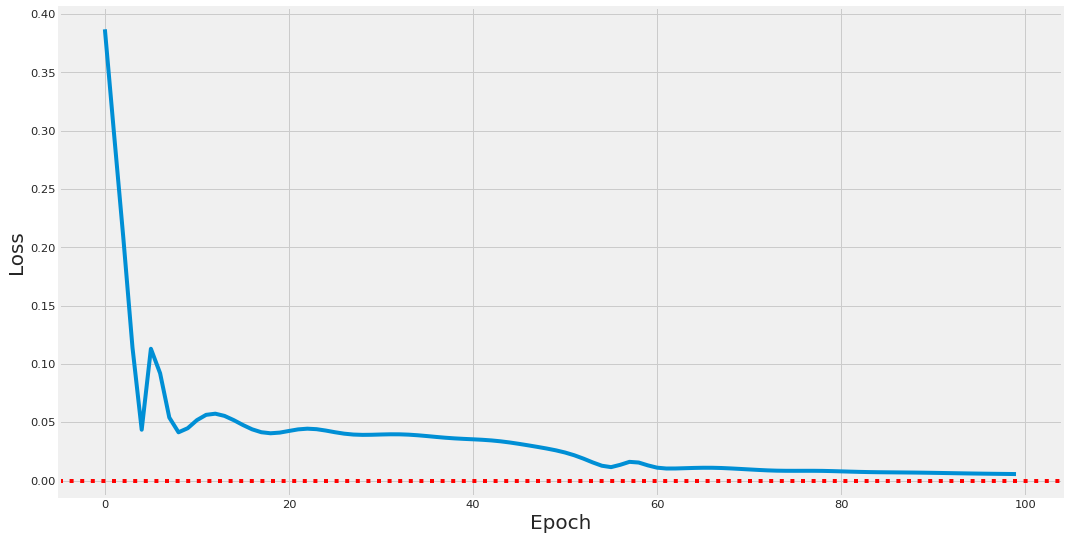

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(hist)
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)

plt.show()

In [ ]:
#Results:

train_score1 = criterion(model_LSTM(i_train_tensor).detach(), o_train_tensor)
test_score1 = criterion(model_LSTM(i_test_tensor).detach(), o_test_tensor)

print('Parametros: ',
          f'\n  Arquiteture {model_LSTM}',
          f'\n  Input lookback length: {sequence_length-1}',
          f'\n  Learning Rate: {learn_rate}',
          f'\n  Training/Testing Relation: {(1-test_percentail)*100}%/{100*test_percentail}%',
          f'\n  Loss function: {criterion}')


print('\nResultados',
      f'\n  Training time: {training_time:.2f} seconds',
      f'\n  Training Loss: {train_score1.item()}',
      f'\n  Test Loss: {test_score1.item()}')

Parametros:  
  Arquiteture LSTM(
  (lstm): LSTM(1, 22, num_layers=2, batch_first=True)
  (fc): Linear(in_features=22, out_features=1, bias=True)
) 
  Input lookback length: 21 
  Learning Rate: 0.01 
  Training/Testing Relation: 95.0%/5.0% 
  Loss function: MSELoss()

Resultados 
  Training time: 3.26 seconds 
  Training Loss: 0.005481699015945196 
  Test Loss: 0.005085214506834745


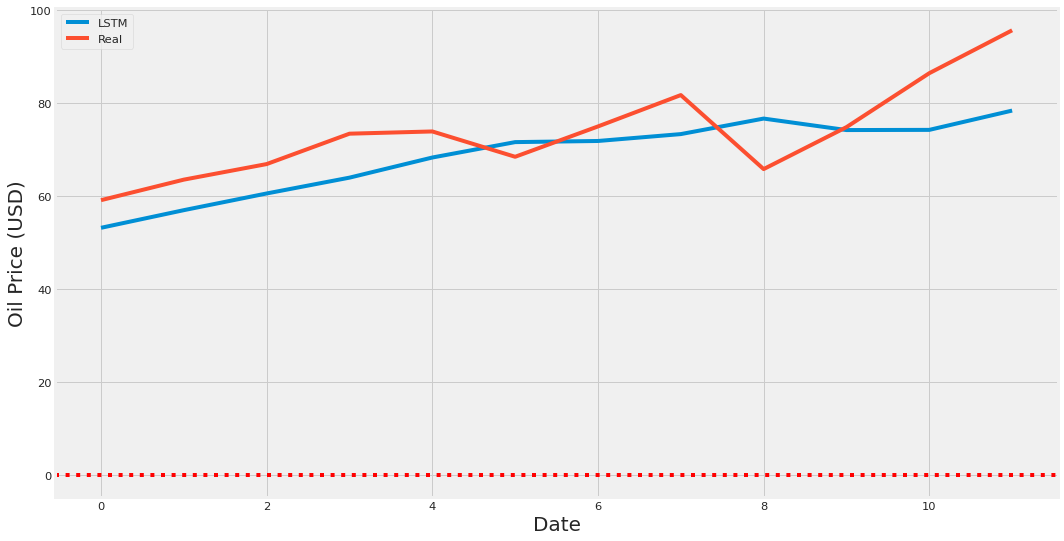

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(scaler.inverse_transform(model_LSTM(i_test_tensor).detach().numpy()))
plt.plot(scaler.inverse_transform(o_test))
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Oil Price (USD)', fontsize=20)
plt.legend(['LSTM', 'Real'])

plt.show()

In [ ]:
# GRU:

class GRU(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
    super(GRU, self).__init__()
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers
    self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    out, (hn) = self.gru(x, (h0.detach()))
    out = self.fc(out[:, -1, :])
    return out

model_GRU = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
#criterion = torch.nn.MSELoss(reduction='sum')
#criterion = torch.nn.L1Loss()
optimiser = torch.optim.Adam(model_GRU.parameters(), lr=learn_rate)
#optimiser = torch.optim.Adagrad(model_GRU.parameters(), lr=learn_rate)
#optimiser = torch.optim.AdamW(model_GRU.parameters(), lr=learn_rate)

hist2 = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
  o_train_out = model_GRU(i_train_tensor)
  loss = criterion(o_train_out, o_train_tensor)
  #print("Epoch ", t+1, "Loss: ", loss.item())
  hist2[t] = loss.item()
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()


training_time_GRU = time.time()-start_time
print(f'Training time: {training_time_GRU}')


Training time: 3.072730302810669


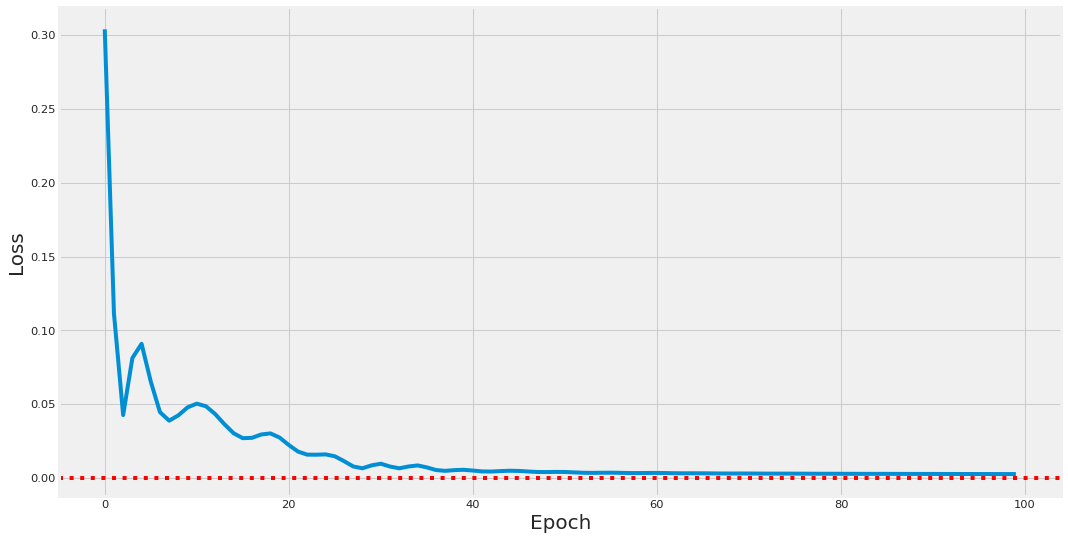

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(hist2)
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)

plt.show()

In [ ]:
train_score2 = criterion(model_GRU(i_train_tensor).detach(), o_train_tensor)
test_score2 = criterion(model_GRU(i_test_tensor).detach(), o_test_tensor)


print('Parametros: ',
          f'\n  Arquiteture {model_GRU}',
          f'\n  Input lookback length: {sequence_length-1}',
          f'\n  Learning Rate: {learn_rate}',
          f'\n  Training/Testing Relation: {(1-test_percentail)*100}%/{100*test_percentail}%',
          f'\n  Loss function: {criterion}')


print('\nResultados',
      f'\n  Training time: {training_time_GRU:.2f}  seconds',
      f'\n  Training Loss: {train_score2.item()}',
      f'\n  Test Loss: {test_score2.item()}')

Parametros:  
  Arquiteture GRU(
  (gru): GRU(1, 22, num_layers=2, batch_first=True)
  (fc): Linear(in_features=22, out_features=1, bias=True)
) 
  Input lookback length: 21 
  Learning Rate: 0.01 
  Training/Testing Relation: 95.0%/5.0% 
  Loss function: MSELoss()

Resultados 
  Training time: 3.07  seconds 
  Training Loss: 0.0026810169219970703 
  Test Loss: 0.004222556948661804


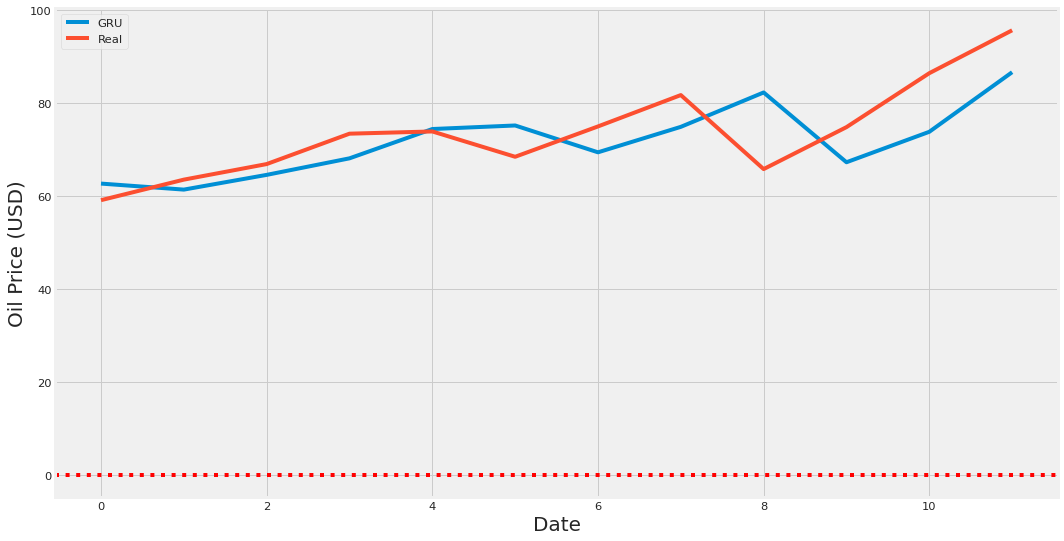

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(scaler.inverse_transform(model_GRU(i_test_tensor).detach().numpy()))
plt.plot(scaler.inverse_transform(o_test))
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Oil Price (USD)', fontsize=20)
plt.legend(['GRU', 'Real'])

plt.show()

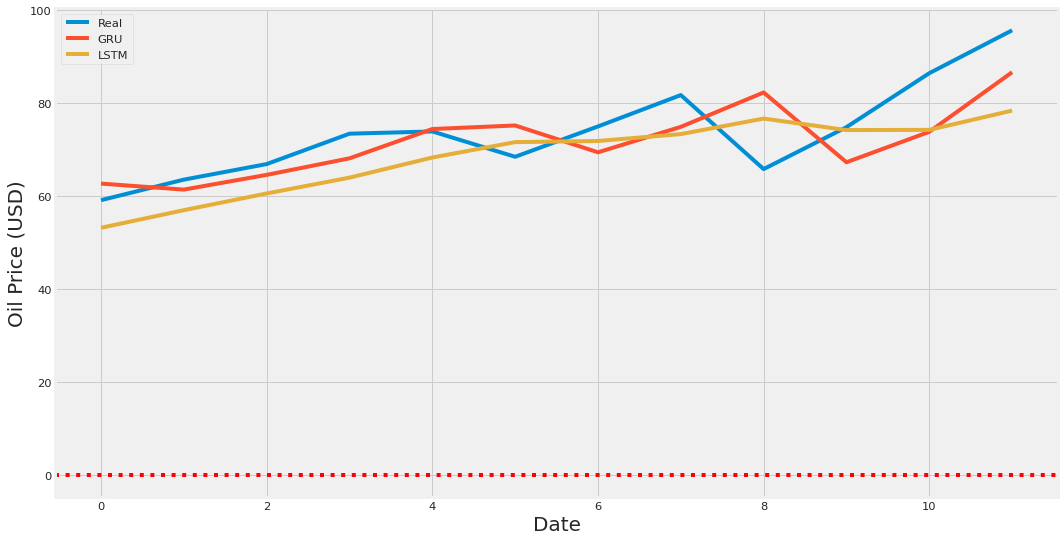

In [ ]:
# Comparing LSTM e GRU:

plt.figure(figsize=(16,9))
plt.plot(scaler.inverse_transform(o_test))
plt.plot(scaler.inverse_transform(model_GRU(i_test_tensor).detach().numpy()))
plt.plot(scaler.inverse_transform(model_LSTM(i_test_tensor).detach().numpy()))
plt.axhline(linestyle='dotted', color='r')
#plt.xticks(range(428),pred_y,rotation=90)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Oil Price (USD)', fontsize=20)

plt.legend(['Real', 'GRU', 'LSTM'])
plt.show()

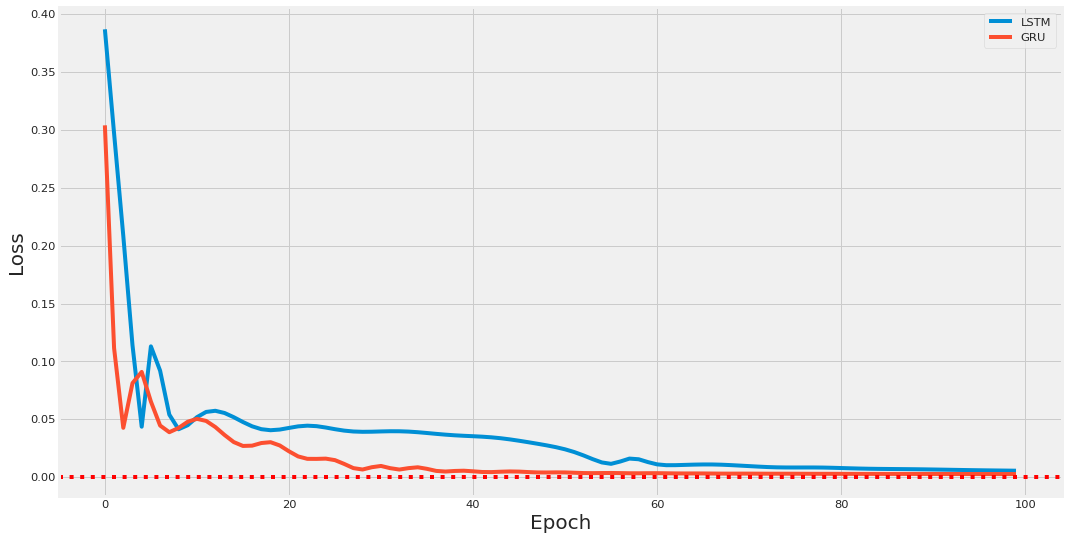

In [ ]:
# Loss function in training (LSTM and GRU):

plt.figure(figsize=(16,9))
plt.plot(hist)
plt.plot(hist2)
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)

plt.legend(['LSTM', 'GRU'])
plt.show()

Shrinkage of crude oil price

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

country_producing = ['United States','Saudi Arabia','Russia','Canada','China','Iraq','UAE','Brazil','Iran','Kuwait']
oil_produced = [19.51,11.81,11.49,5.50,4.89,4.74,4.01,3.67,3.19,2.94]

fig = go.Figure(data=[go.Pie(labels=country_producing,
                             values=oil_produced)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20)
fig.update_layout(title=go.layout.Title(text="<b>World's Largest Oil Producers (mn barrels/day)</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Source: EIA, 2019 data',
            xanchor='right',
            x=0.75,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )])

fig.show()

In [ ]:
country_consuming = ['United States','China','India','Japan','Russia','Saudi Arabia','Brazil','South Korea','Germany','Canada']
consumption = [19.96,13.57,4.32,3.92,3.69,3.33,3.03,2.63,2.45,2.42]

fig = go.Figure(data=[go.Pie(labels=country_consuming,
                             values=consumption)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20)
fig.update_layout(title=go.layout.Title(text="<b>World's Largest Oil Consumers (mn barrels/day)</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Source: EIA, 2017 data',
            xanchor='right',
            x=0.75,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )])

fig['layout']['xaxis'].update(side='top')

fig.show()


In [ ]:
country_export = ['Saudi Arabia','Russia','Iraq','Canada','UAE','Kuwait','Iran','United States','Nigeria','Kazakhstan','Angola','Norway','Libya','Mexico','Venezuela']
export = [182.5,129,91.7,66.9,58.4,51.7,50.8,48.3,43.6,37.8,36.5,33.3,26.7,26.5,26.4]

fig = go.Figure(data=[go.Pie(labels=country_export,
                             values=export)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20)
fig.update_layout(title=go.layout.Title(text="<b>World's Largest Oil Exporters (US$ billion)</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Source: OECD, 2019 data',
            xanchor='right',
            x=0.75,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )])

fig['layout']['xaxis'].update(side='top')

fig.show()

In [ ]:
affected_country = ['Iraq','Libya','Congo Republic','Kuwait','South Sudan','Saudi Arabia','Oman','Equatorial Guinea','Azerbaijan','Angola','Iran','Gabon','Timor-Leste','Qatar','UAE']
oil_rent = [37.8,37.3,36.7,36.6,31.3,23.1,21.8,19.2,17.9,15.8,15.3,15.3,14.5,14.2,13.1]
affected_country = affected_country[::-1]
oil_rent = oil_rent[::-1]


fig = go.Figure(go.Bar(
            x=oil_rent,
            y=affected_country,
            orientation='h',
            text = oil_rent,
            textposition='auto'))
fig.update_traces(marker_color='purple')

fig.update_layout(title=go.layout.Title(text="<b>Countries Heavily Dependent on Oil Profits to Power GDP</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Source: World Bank',
            xanchor='right',
            x=35,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=10,
                color="black"
            )
          )])

fig['layout']['xaxis'].update(side='top')

fig.show()